In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('iphone_purchase_records.csv')

In [3]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.shape

(400, 4)

In [6]:
df.drop('Gender',axis = 1, inplace = True)

In [7]:
df.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Split the data

X- Feature variables
y- Target variables

In [8]:
X = df.drop('Purchase Iphone', axis = 1).values
Y = df['Purchase Iphone'].values

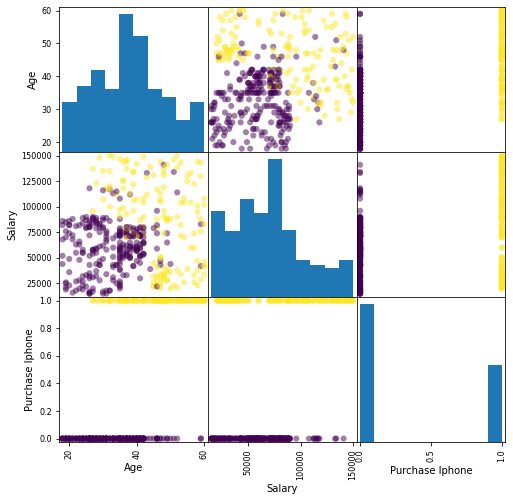

In [9]:
pd.plotting.scatter_matrix(df, c = Y, figsize = [8,8], s=150);

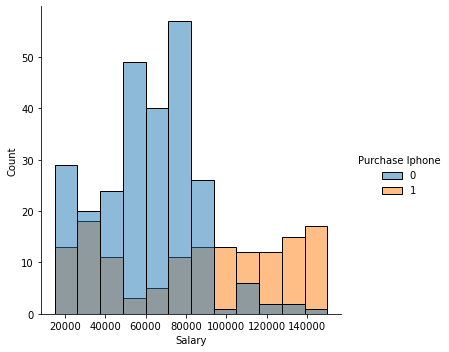

In [10]:
sns.displot(df, x= 'Salary', hue = 'Purchase Iphone');

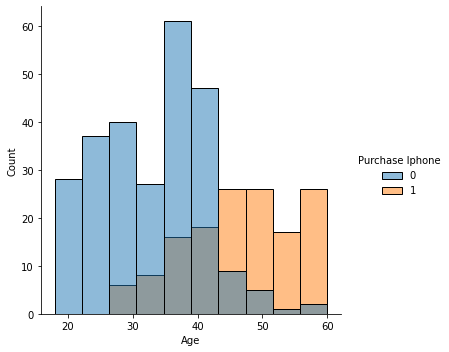

In [11]:
sns.displot(df, x= 'Age', hue = 'Purchase Iphone');

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state = 18, stratify = Y)

Text(0, 0.5, 'accuracy')

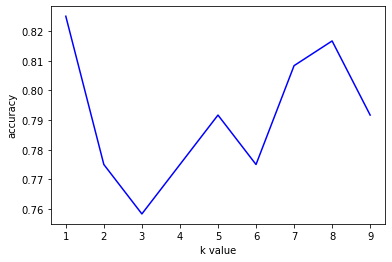

In [14]:
accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(range(1,10), accuracy, color='blue')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [16]:
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.8166666666666667

In [21]:
from mlxtend.plotting import plot_decision_regions
X = df.drop('Purchase Iphone', axis = 1).to_numpy()
Y = df['Purchase Iphone'].to_numpy()

<AxesSubplot:>

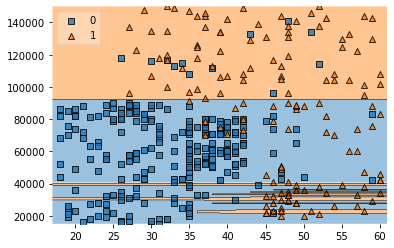

In [26]:
plot_decision_regions(X, Y,clf = knn, legend=2)